# EDA Q3: Which features are most correlated with Price?

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Cleaned Data

In [52]:
data = pd.read_csv('csv_files/added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('csv_files/dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [53]:
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 2. Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

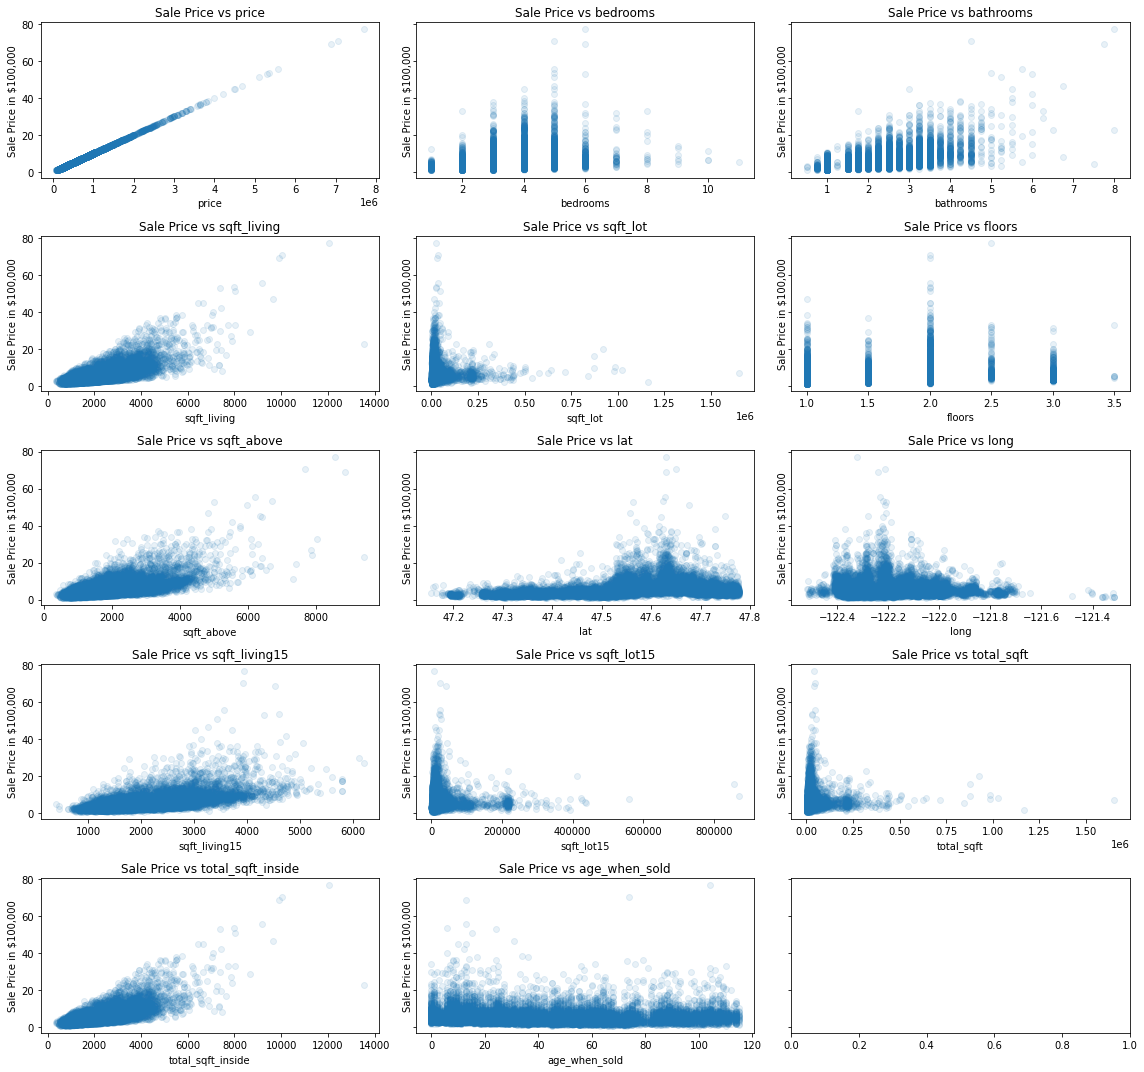

In [54]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [55]:
# checking correlation between each feature and price
final_data.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_living          0.704079
total_sqft_inside    0.702235
sqft_above           0.608251
sqft_living15        0.580673
                       ...   
decade_built_1960   -0.085828
grade_binned_Poor   -0.087692
city_Renton         -0.102187
city_FederalWay     -0.132005
city_Kent           -0.159633
Name: price, Length: 66, dtype: float64

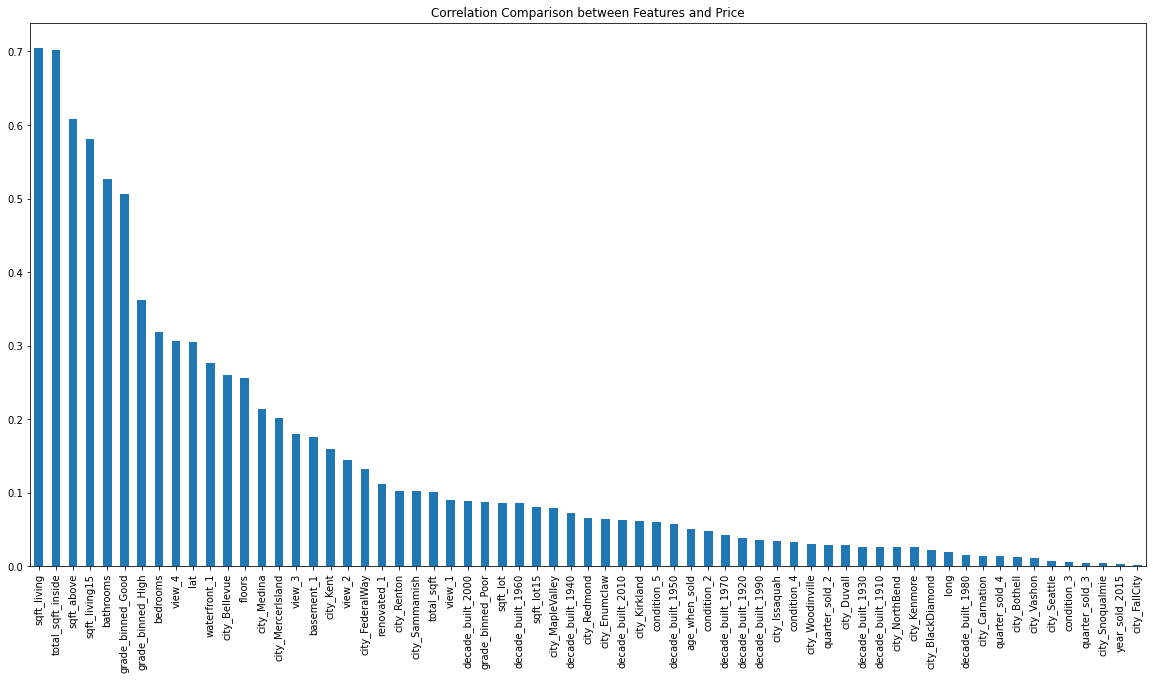

In [56]:
# plotting correlation between each feature and price
plt.figure(figsize=(20,10))
abs(final_data.corr())['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar').set_title(
    'Correlation Comparison between Features and Price');
plt.savefig('images/EDA_3_bar.png')
plt.show()

# Check Multicollinearity

In [63]:
pd.set_option('display.max_columns',100)
data_corr = final_data.corr()['price'].sort_values(ascending=False)
data_corr

price                1.000000
sqft_living          0.704079
total_sqft_inside    0.702235
sqft_above           0.608251
sqft_living15        0.580673
                       ...   
decade_built_1960   -0.085828
grade_binned_Poor   -0.087692
city_Renton         -0.102187
city_FederalWay     -0.132005
city_Kent           -0.159633
Name: price, Length: 66, dtype: float64

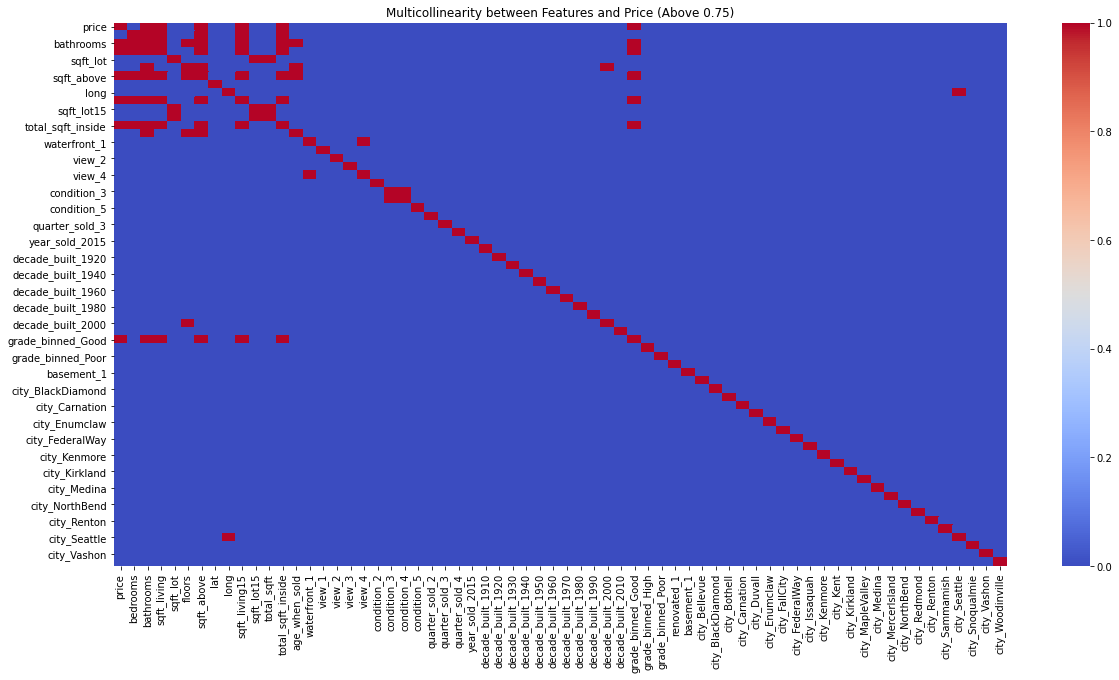

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(data_corr.corr()) > 0.75, cmap='coolwarm').set_title(
    'Multicollinearity between Features and Price (Above 0.75)');
plt.savefig('images/EDA_3_multicollinearity.png')
plt.show()

In [59]:
# fig, ax = plt.subplots(figsize=(15,10)) 
# sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.savefig('images/EDA_3_multicollinearity.png')
# plt.show()